# Import required libraries & headbrain dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from sklearn import neighbors

from math import sqrt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.externals import joblib

In [2]:
df_headbrain=pd.read_csv("headbrain.csv")

# Exploratory Data Analysis

In [3]:
df_headbrain.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [4]:
# Check null values using info() function or isnull() or notnull() method.
df_headbrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gender       237 non-null    int64
 1   AgeRange     237 non-null    int64
 2   HeadSize     237 non-null    int64
 3   BrainWeight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [5]:
# Check datatypes of all columns values
df_headbrain.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

In [6]:
# Checking for skewness; skewness not available in below output
df_headbrain.skew()

Gender         0.265554
AgeRange      -0.144748
HeadSize       0.238807
BrainWeight    0.265478
dtype: float64

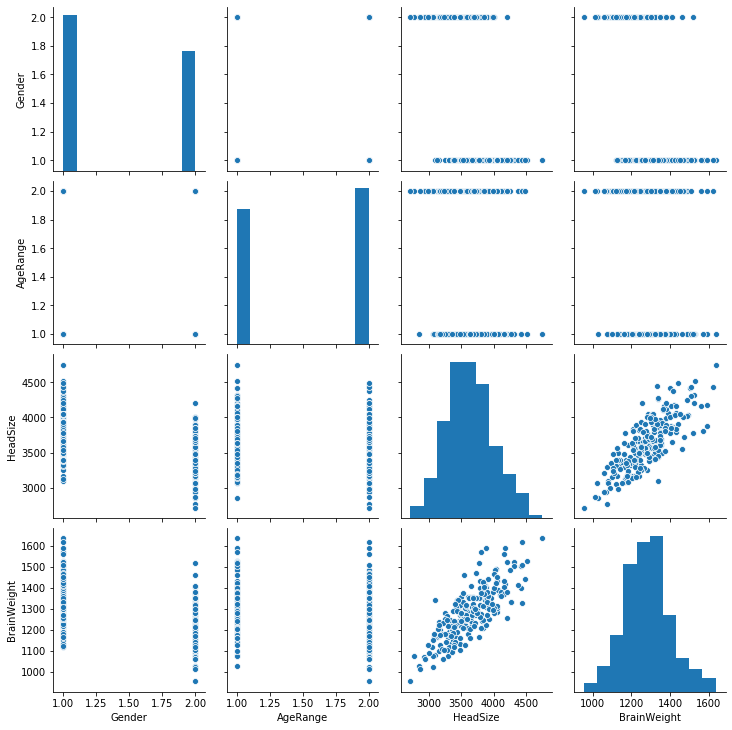

In [7]:
# draw pairplot & check the outcome to decide which ML Algorithm to apply
sns.pairplot(df_headbrain)
plt.show()

In [8]:
# Check for the outliers,apply zscore

from scipy.stats import zscore
z_score=abs(zscore(df_headbrain))
print(df_headbrain.shape)
df_headbrain_final=df_headbrain.loc[(z_score<3).all(axis=1)]
print(df_headbrain_final.shape)

(237, 4)
(236, 4)


In [9]:
# Separating target & input variables
import numpy as np
df_x=df_headbrain_final.drop(columns=["BrainWeight"])
y=df_headbrain_final[["BrainWeight"]]

In [10]:
# scalling the input variable
# linear regression algorith requires all feature to be on common scale

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [11]:
# lets again check for skewness
x.skew()

Gender      0.257959
AgeRange   -0.153968
HeadSize    0.164767
dtype: float64

# Apply train_test_split method using different linear Regression techniques

In [12]:
# Split data using train_test_split method

x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 45,test_size=0.20)

In [13]:
# Use for loop to iterate rstate to get the r2score.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_rscore=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    regrn = linear_model.LinearRegression()
    regrn.fit(x_train,y_train)
    y_pred = regrn.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_rscore:
        max_rscore=r2_scr
        final_r_state=r_state
print("max r2 score corresponds to",final_r_state," is ",max_rscore)   

max r2 score corresponds to 90  is  0.7860723139539596


In [14]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.5868292426216075
0.5011950692464882
0.16393669648066933


In [15]:
# Check for which K value RMSE is lowest; here K=5 gives RMSE =71.27

rmse_val = []      # to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  # fit the model
    pred=model.predict(x_test)   # make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error)       # store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 93.0819531380815
RMSE value for k=  2 is: 73.44750818328238
RMSE value for k=  3 is: 79.03966421056278
RMSE value for k=  4 is: 76.4972085547353
RMSE value for k=  5 is: 71.27926884211614
RMSE value for k=  6 is: 72.35274797054284
RMSE value for k=  7 is: 73.25034826134386
RMSE value for k=  8 is: 75.10946438781866
RMSE value for k=  9 is: 74.32335197061653
RMSE value for k=  10 is: 74.90497035132803


In [16]:
# import KNeighborsClassifier model 

from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors = 5) 
  
# train model 
knn.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Save the Model using pickle or joblib library

In [17]:
from sklearn.externals import joblib

joblib_file = "joblib_regrn.pkl"             # Save to file in the current working directory
joblib.dump(regrn, joblib_file)
joblib_regrn = joblib.load(joblib_file)      # Load from file
score = joblib_regrn.score(x_test, y_test)   # Calculate the accuracy and predictions
print("Test score for linear regression: {0:.2f} %".format(100 * score))


Test score for linear regression: 60.85 %
